In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

starved_period,
food_type,
straightness_index,
avgve,
avg_cum_dist,
avg_rad_dist,
first_meal_dur,
vol_first

In [2]:
data = np.load('firstmeal_var.npy',allow_pickle=True)
flynum = data[1].shape[0] #384

In [3]:
starved_period = data[0].astype(np.float)
food_type = data[1]
straightness_index = data[2]  
avgve = data[3]
avg_cum_dist = data[4]
avg_rad_dist = data[5]
first_meal_dur = data[6]

vol_first = data[7]
y = vol_first

## Normalizing X-features [0-1]

In [4]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [5]:
X = np.vstack([starved_period, food_type, straightness_index, 
               avgve, avg_cum_dist, avg_rad_dist, first_meal_dur]) 

In [6]:
X_norm = np.zeros(X.shape)

for n in range(len(X)):
    X_norm[n] = NormalizeData(X[n])

X_norm = X_norm.T #(384, 7)

## Training with K-Fold CV 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## SVM w/ RBF kernel
0.0001 < gamma < 10
0.1 < c < 100 (inversely affecting ea)

In [8]:
from sklearn.svm import SVR  

C_all =  np.arange(0.1,100,1).tolist()
gamma_all = np.arange(0.0001,10,0.1).tolist()

meanscores = []
for i in range(len(C_all)):
    svr = SVR(kernel = 'rbf', C = C_all[i], gamma = gamma_all[i])
    scores = cross_val_score(svr, X_norm, y, cv = 5)
    meanscores.append(scores.mean())
meanscores = np.array(meanscores)

In [9]:
idx_bestparam = np.argmax(meanscores)
print('Best Parameter ' + 'C: '+ str(C_all[idx_bestparam]) 
      + ' gamma: ' + str(gamma_all[idx_bestparam]))

Best Parameter C: 58.1 gamma: 5.8001000000000005


In [13]:
#Model
svr = SVR(kernel = 'rbf', C = 58.1, gamma = 5.8)
scores = cross_val_score(svr, X_norm, y, cv = 5).mean()
print(svr)
print('Accuracy Score (Cross-Validated): ' + str(scores*100))

SVR(C=58.1, gamma=5.8)
Accuracy Score (Cross-Validated): 63.1006639756603


## Prediction

In [14]:
X_trn, X_tst, y_trn, y_tst = train_test_split(X_norm, y, test_size=0.33)

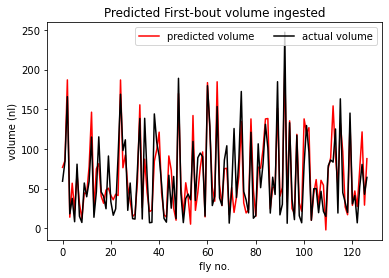

In [17]:
pred = svr.fit(X_trn,y_trn).predict(X_tst)
act = y_tst
plt.title('Predicted First-bout volume ingested')
plt.plot(pred,label='predicted volume', color = 'red')
plt.plot(act,label='actual volume', color = 'k')
plt.legend(ncol=2)
plt.ylabel('volume (nl)')
plt.xlabel('fly no.')
plt.show()